In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [2]:
test = pd.read_csv('test (1).csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
train = pd.read_csv ('train (1).csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
gs = pd.read_csv ('gender_submission.csv')
gs

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train.drop('Cabin',axis=1, inplace=True)
test = test.drop('Cabin',axis=1)

In [8]:
train = train.drop('Name',axis=1)
test = test.drop('Name',axis=1)

In [9]:
test['Fare'].fillna(method = 'ffill',inplace=True)

In [10]:
#Filling null values with mean
train['Age'].fillna(train['Age'].mean(), inplace=True)
train['Age']=train['Age'].round(0)
test['Age'].fillna(test['Age'].mean(), inplace=True)
test['Age']=test['Age'].round(0)

In [11]:
#Filling null values with mode
mode_value = train['Embarked'].mode().iloc[0]
train['Embarked'].fillna(mode_value, inplace=True)

In [12]:
#changing categorical values (dummy variable)
train = pd.get_dummies(train,columns=['Sex'],drop_first = True)
train.rename(columns = {'Sex_male':'Sex'}, inplace = True)
test = pd.get_dummies(test,columns=['Sex'],drop_first = True)
test.rename(columns = {'Sex_male':'Sex'}, inplace = True)

In [13]:
#changing categorical values
train.loc[train['Embarked'] == 'S', 'Embarked'] = 0
train.loc[train['Embarked'] == 'C', 'Embarked'] = 1
train.loc[train['Embarked'] == 'Q', 'Embarked'] = 2
test.loc[test['Embarked'] == 'S', 'Embarked'] = 0
test.loc[test['Embarked'] == 'C', 'Embarked'] = 1
test.loc[test['Embarked'] == 'Q', 'Embarked'] = 2

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
 9   Sex          891 non-null    uint8  
dtypes: float64(2), int64(5), object(2), uint8(1)
memory usage: 63.6+ KB


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Ticket       418 non-null    object 
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
 8   Sex          418 non-null    uint8  
dtypes: float64(2), int64(4), object(2), uint8(1)
memory usage: 26.7+ KB


In [16]:
#deleting unnecessary columns
train = train.drop('PassengerId',axis=1)
train = train.drop('Ticket',axis=1)

# Visualization

Text(0.5, 1.0, 'Training Set Correlations')

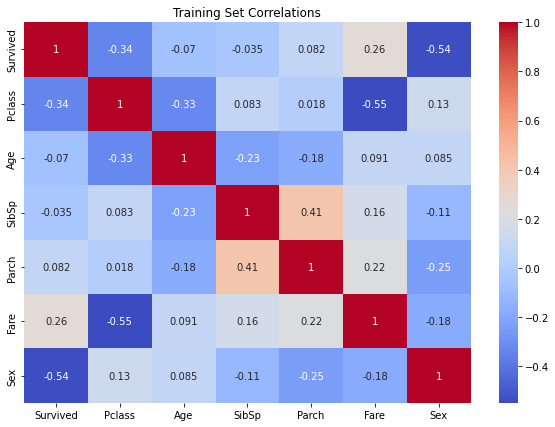

In [17]:
#Heatmap of correlation
plt.figure(figsize=(10,7))
heat = sns.heatmap(data=train.corr(), annot=True, cmap='coolwarm')

heat.set_title('Training Set Correlations')

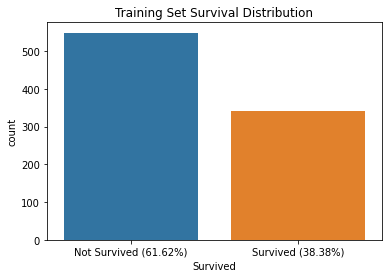

In [18]:
survived = train['Survived'].value_counts()[1]
not_survived = train['Survived'].value_counts()[0]
survived_per = survived / train.shape[0] * 100
not_survived_per = not_survived / train.shape[0] * 100



sns.countplot(x = train['Survived'])


plt.xticks((0, 1), ['Not Survived ({0:.2f}%)'.format(not_survived_per), 'Survived ({0:.2f}%)'.format(survived_per)])


plt.title('Training Set Survival Distribution')

plt.show()

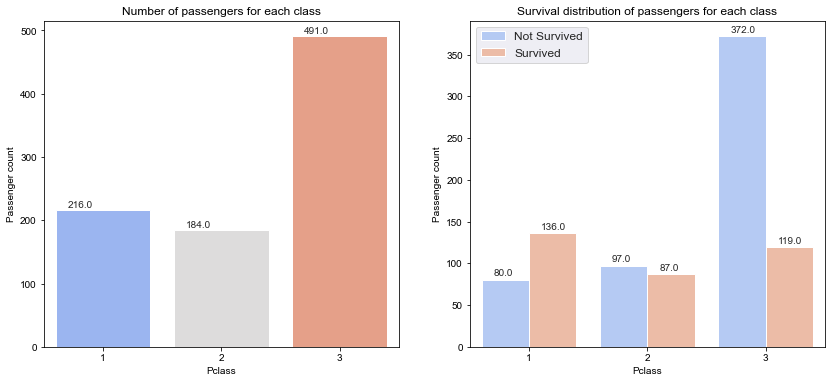

In [19]:
f,ax=plt.subplots(1,2,figsize=(14,6))
sns.set_style('darkgrid')

cc = sns.countplot(x='Pclass',data = train, palette='coolwarm', ax = ax[0])
for p in cc.patches:
        cc.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))
ax[0].set_title('Number of passengers for each class')
ax[0].set_ylabel('Passenger count')

cs = sns.countplot(x='Pclass',data = train,hue = 'Survived', palette='coolwarm',ax=ax[1])
for p in cs.patches:
        cs.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))
ax[1].set_title('Survival distribution of passengers for each class')
ax[1].set_ylabel('Passenger count')
ax[1].legend(['Not Survived', 'Survived'], loc='upper left', prop={'size': 12})
plt.show()

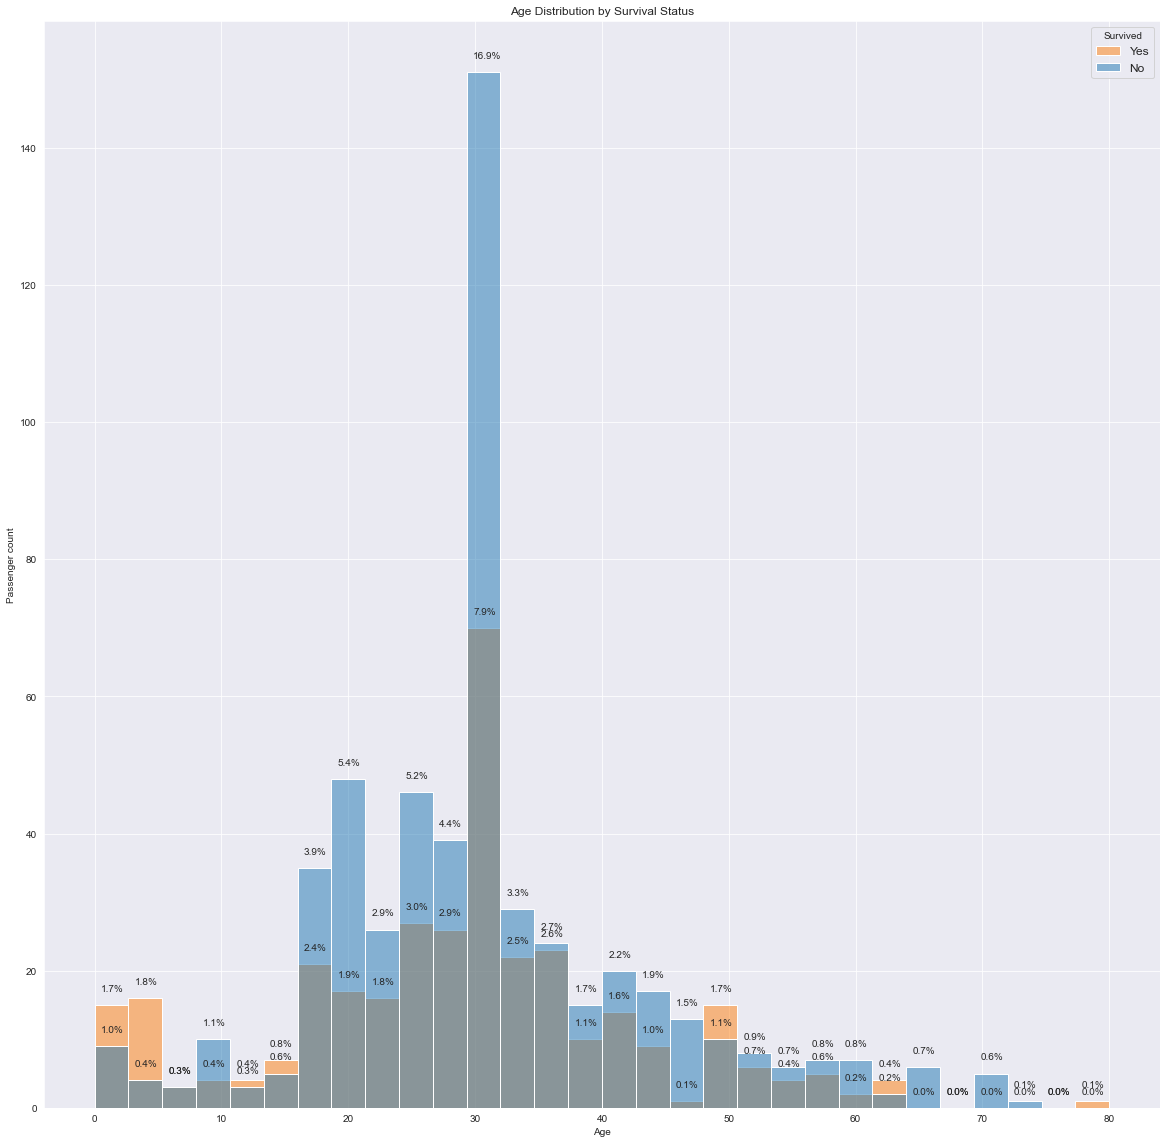

In [20]:
plt.figure (figsize=(20,20))
sns.set_style('darkgrid')
ca = sns.histplot(data=train, x = 'Age', hue = 'Survived')
for p in ca.patches:
        ca.annotate('{:.1f}%'.format(100*p.get_height()/(len(train['Age'])*1)), (p.get_x()+0.5, p.get_height()+2))
plt.title('Age Distribution by Survival Status')
plt.ylabel('Passenger count')
plt.legend(title='Survived', loc='upper right', labels=['Yes', 'No'], prop={'size': 12})

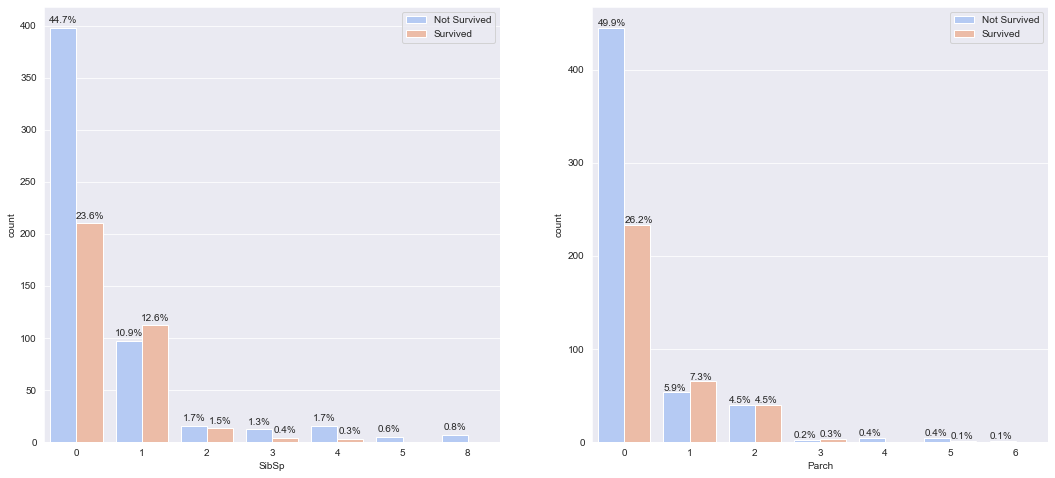

In [21]:
f, ax= plt.subplots(1,2, figsize = (18,8))
ca = sns.countplot(data = train, x= 'SibSp', hue = 'Survived', palette = 'coolwarm', ax = ax[0])
ax[0].set_title = 'Survival distribution of passengers for SibSp'
ax[0].set_ylabel = 'Passenger count'
ax[0].legend(['Not Survived','Survived'], loc='upper right')

for p in ca.patches:
    height = p.get_height()
    ca.annotate('{:.1f}%'.format(100 * height / (len(train['SibSp']) * 1)), 
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 3), 
                textcoords="offset points",
                ha='center',
                va='bottom')

ca = sns.countplot(data = train, x= 'Parch', hue = 'Survived', palette = 'coolwarm', ax = ax[1])

for p in ca.patches:
        ca.annotate('{:.1f}%'.format(100*p.get_height()/(len(train['Parch'])*1)), (p.get_x()+0, p.get_height()+2))
ax[1].set_title = 'Survival distribution of passengers for Parch'
ax[1].set_ylabel = 'Passenger count'
ax[1].legend(['Not Survived','Survived'], loc='upper right')


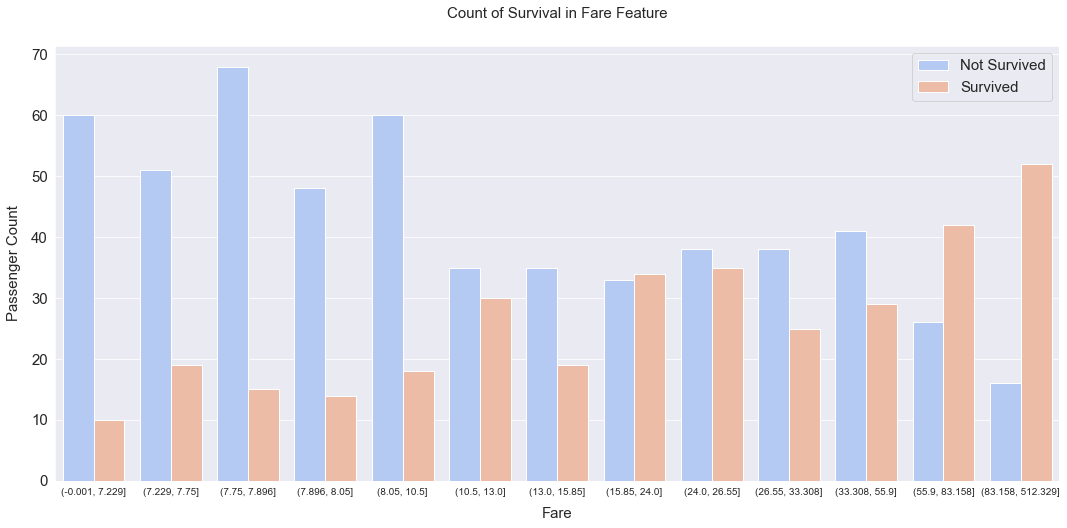

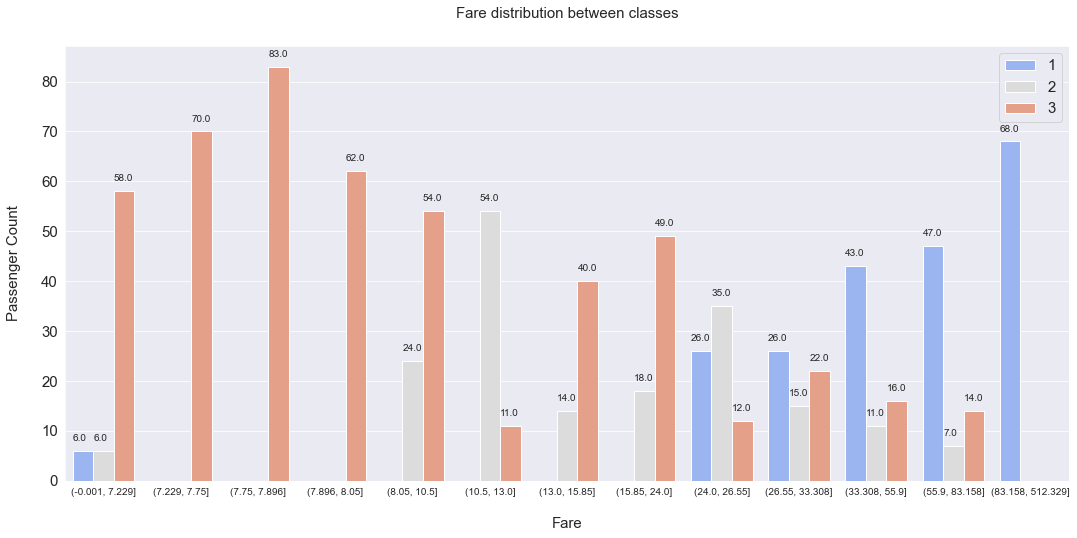

In [22]:
fig, axs = plt.subplots(figsize=(18, 8))
sns.countplot(x=pd.qcut(train['Fare'], 13), hue='Survived', data=train, palette='coolwarm')

plt.xlabel('Fare', size=15, labelpad=10)
plt.ylabel('Passenger Count', size=15, labelpad=10)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=15, y=1.05)
plt.show()


fig, axs = plt.subplots(figsize=(18, 8))
cs = sns.countplot(x=pd.qcut(train['Fare'], 13), hue='Pclass', data=train, palette='coolwarm')

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)
for p in cs.patches:
        cs.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0, p.get_height()+2))

plt.legend(['1', '2', '3'], loc='upper right', prop={'size': 15})
plt.title('Fare distribution between classes', size=15, y=1.05)
plt.show()

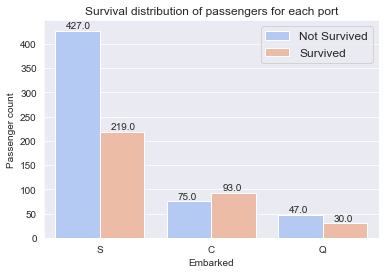

In [23]:
cs = sns.countplot(x='Embarked',data = train, hue = 'Survived', palette='coolwarm')
for p in cs.patches:
        cs.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))
plt.title('Survival distribution of passengers for each port')
plt.xticks([0, 1, 2], ['S', 'C', 'Q'])
plt.ylabel('Passenger count')
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})
plt.show()

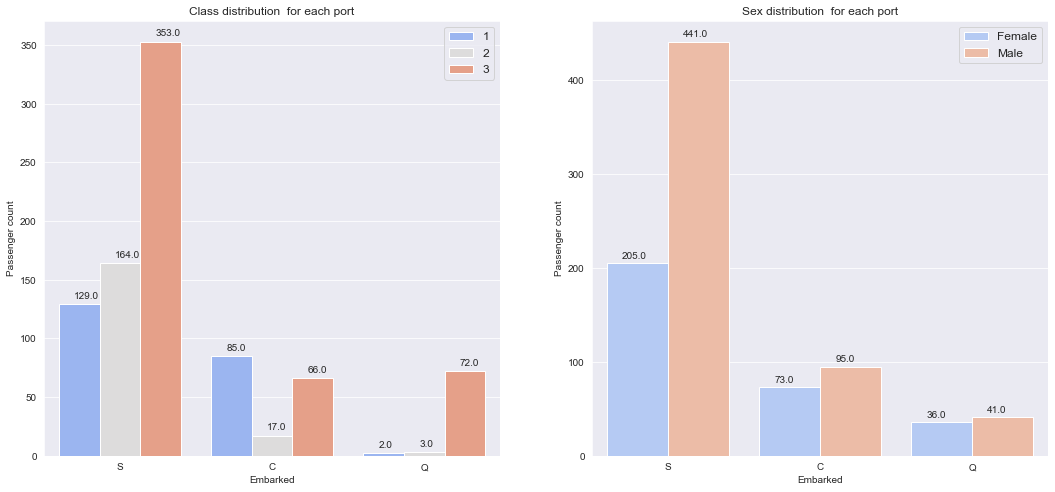

In [24]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.set_style('darkgrid')
cs = sns.countplot(x='Embarked',data = train,hue = 'Pclass', palette='coolwarm', ax=ax[0])
for p in cs.patches:
        cs.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))
ax[0].set_title('Class distribution  for each port')
ax[0].set_xticklabels(['S', 'C', 'Q'])
ax[0].set_ylabel('Passenger count')
ax[0].legend(['1', '2', '3'], loc='upper right', prop={'size': 12})

cs = sns.countplot(x='Embarked',data = train,hue = 'Sex', palette='coolwarm', ax=ax[1])
for p in cs.patches:
        cs.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))
ax[1].set_title('Sex distribution  for each port')
ax[1].set_xticklabels(['S', 'C', 'Q'])
ax[1].set_ylabel('Passenger count')
ax[1].legend(['Female', 'Male'], loc='upper right', prop={'size': 12})
plt.show()

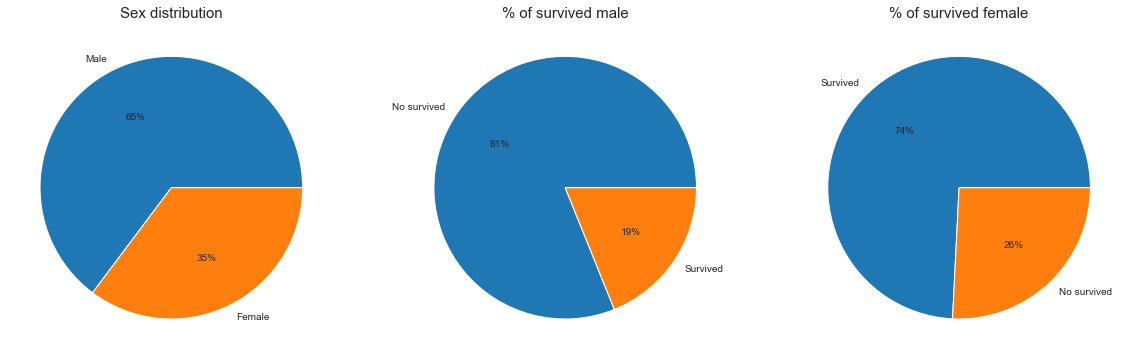

In [25]:
fig, ax = plt.subplots(1, 3, figsize=(20,8))

ax[0].pie(train.loc[train['Sex'],'Sex'].value_counts(),labels = ['Male','Female'],autopct='%1.0f%%')
ax[0].set_title('Sex distribution', fontsize = 15)

ax[1].pie(train.loc[train["Sex"] == 1, "Survived"].value_counts(),labels = ['No survived','Survived'],autopct='%1.0f%%')
ax[1].set_title('% of survived male', fontsize = 15)

ax[2].pie(train.loc[train["Sex"] == 0, "Survived"].value_counts(),labels = ['Survived','No survived'], autopct='%1.0f%%')
ax[2].set_title('% of survived female', fontsize = 15)

plt.show()

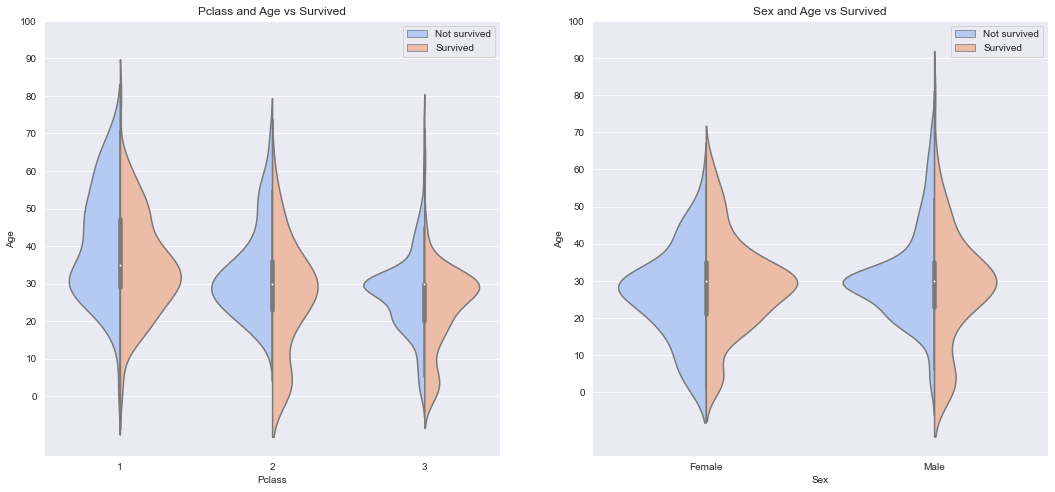

In [26]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.set_style('darkgrid')
sns.violinplot(x = "Pclass",y = "Age", hue="Survived", data=train,palette='coolwarm',split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
ax[0].legend(handles=ax[0].legend_.legendHandles, labels=['Not survived', 'Survived'])
sns.violinplot(x = "Sex",y = "Age", hue="Survived", data=train,palette = 'coolwarm',split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
ax[1].legend(handles=ax[1].legend_.legendHandles, labels=['Not survived', 'Survived'])
ax[1].set_xticklabels(['Female', 'Male'])
plt.show()

# Predictions

In [27]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 

In [28]:
X = train.drop('Survived', axis =1)
y = train['Survived']
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 101)

In [29]:
#Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       127
           1       0.78      0.65      0.71        96

    accuracy                           0.77       223
   macro avg       0.77      0.76      0.76       223
weighted avg       0.77      0.77      0.77       223

[[110  17]
 [ 34  62]]


In [30]:
# K-Nearest Neighbor (KNN)
error = []
for i in range (1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_predi = knn.predict(X_test)
    error.append(np.mean(y_predi != y_test))

Text(0, 0.5, 'Error')

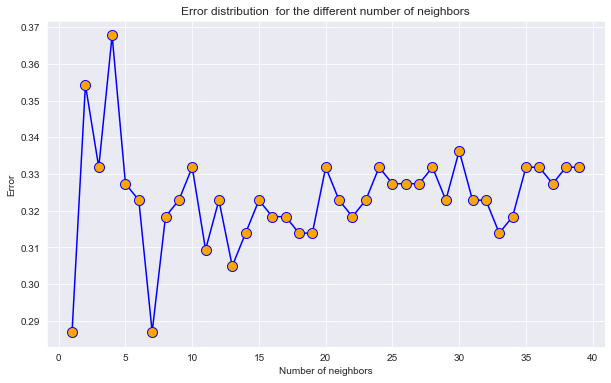

In [31]:
plt.figure(figsize=(10,6))
er = plt.plot(range(1,40),error,color='blue',marker='o',markerfacecolor='orange',markersize=10)
plt.title('Error distribution  for the different number of neighbors')
plt.xlabel('Number of neighbors')
plt.ylabel('Error')

In [32]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77       127
           1       0.72      0.55      0.62        96

    accuracy                           0.71       223
   macro avg       0.71      0.69      0.70       223
weighted avg       0.71      0.71      0.71       223

[[106  21]
 [ 43  53]]


In [33]:
#Random Forest algorithm
random_forest = RandomForestClassifier(n_estimators=200)

random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       127
           1       0.80      0.70      0.74        96

    accuracy                           0.79       223
   macro avg       0.79      0.78      0.79       223
weighted avg       0.79      0.79      0.79       223

[[110  17]
 [ 29  67]]


In [34]:
X_data = test.drop(['PassengerId', 'Ticket'], axis=1).copy()
X_train = train.drop('Survived', axis =1)
y_train = train['Survived']

In [35]:
random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_data)

In [36]:
PassengerId = test['PassengerId']
test = test.drop('Ticket',axis=1)

# Result

In [37]:
submission = pd.DataFrame({'PassengerId': PassengerId, 'Survived':Y_pred })
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
